# Introduction

This project focuses on visualizing the "Netflix Stock Profile". In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, we will only visualize data for the year of 2017. Specifically, in creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

During this project, we will analyze, prepare, and plot data. The visualizations will help the financial analysts asses the risk of the Netflix stock.

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


### Modules

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false
}

<IPython.core.display.Javascript object>

### Netflix Stocks 2017 Data 

Let's load the datasets and inspect them.

Load **NFLX.csv** into a DataFrame called `netflix_stocks`. Then, quickly inspect the DataFrame using `print()`.

Hint: Use the `pd.read_csv()`function).

Note: In the Yahoo Data, `Adj Close` represents the adjusted close price adjusted for both dividends and splits. This means this is the true closing stock price for a given business day.

In [3]:
netflix_stocks = pd.read_csv("NFLX.csv")
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


In [4]:
netflix_stocks.shape

(12, 7)

In [5]:
netflix_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
Date         12 non-null object
Open         12 non-null float64
High         12 non-null float64
Low          12 non-null float64
Close        12 non-null float64
Adj Close    12 non-null float64
Volume       12 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 752.0+ bytes


Load **DJI.csv** into a DataFrame called `dowjones_stocks`. Then, quickly inspect the DataFrame using `print()`.

Note: You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 


### Dow Jones Industrial Average 2017 Data

In [6]:
dowjones_stocks = pd.read_csv('DJI.csv')
dowjones_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


In [7]:
dowjones_stocks.shape

(12, 7)

In [8]:
dowjones_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
Date         12 non-null object
Open         12 non-null float64
High         12 non-null float64
Low          12 non-null float64
Close        12 non-null float64
Adj Close    12 non-null float64
Volume       12 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 752.0+ bytes


Load **NFLX_daily_by_quarter.csv** into a DataFrame called `netflix_stocks_quarterly`. Then, quickly inspect the DataFrame using `print()`.


In [9]:
netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


In [10]:
netflix_stocks_quarterly.shape

(251, 8)

In [11]:
netflix_stocks_quarterly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
Date         251 non-null object
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
Quarter      251 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 15.8+ KB


### Data Analysis


 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV files are named accordingly
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.
 
The Data represent the stock profiles for the Year 2017. Both The Data for Netflix Stocks, and Dowjones are presented by months. While the quarterly netflix stocks data is presented by day.

The netflix stocks and dowjones file both reflect the data for stock performance at the beginning of each month for the year 2017, while the quarterly data represents the daily stock performance of netflix stocks for the year 2017, aggregated quarterly.

### Data Cleaning

In [12]:
netflix_stocks.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

Pandas will be used to change the name of of the column to `Adj Close` to `Price` so that it is easier to work with the data.

In [13]:
netflix_stocks.rename(columns={'Adj Close': 'Price'}, inplace=True)
dowjones_stocks.rename(columns={'Adj Close': 'Price'}, inplace=True)
netflix_stocks_quarterly.rename(columns={'Adj Close': 'Price'}, inplace=True)

Run `netflix_stocks.head()` again to check your column name has changed.

In [14]:
netflix_stocks.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Price', 'Volume'], dtype='object')

Call `.head()` on the DataFrame `dowjones_stocks` and `netflix_stocks_quarterly`.

In [15]:
dowjones_stocks.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Price', 'Volume'], dtype='object')

In [16]:
netflix_stocks_quarterly.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Price', 'Volume', 'Quarter'], dtype='object')

### Visualizing Netflix Quarterly Data Distribution and Summary Statistics

In this step, we will be visualizing the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We can accomplish this using a violin plot with four violins, one for each business quarter!


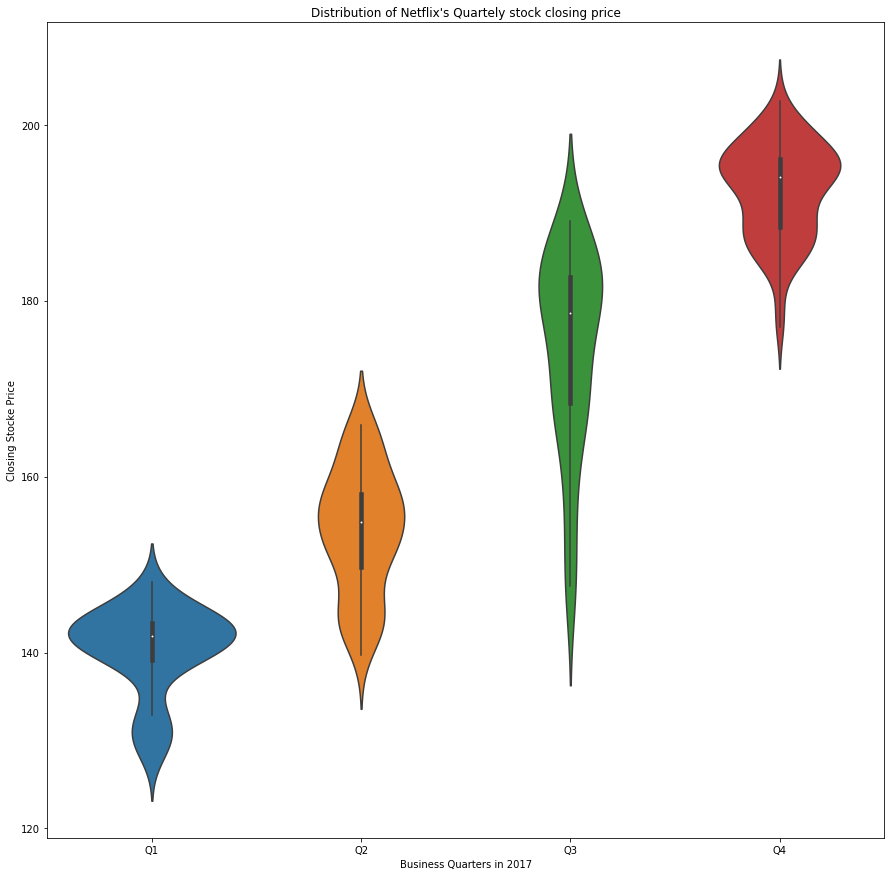

In [17]:
fig = plt.figure(figsize=(15,15))
ax = plt.subplot()
sns.violinplot(data=netflix_stocks_quarterly, x='Quarter', y='Price')
sns.set_context("notebook")
sns.color_palette("RdBu")
ax.set_title('Distribution of Netflix\'s Quartely stock closing price')
plt.xlabel("Business Quarters in 2017")
plt.ylabel("Closing Stocke Price")
plt.show()

#### Interpretation of  Violion Plots - Assumptions
Netflix experienced increase in their stock price over the quarters in 2017, with Q1 having the lowest stock value and priced just above \\$120 and Q4 having the highest stock value with more than 50 percent increase from Q1 to amount to above \\$200. The stock price had a wide distribution in Q3 amounting to about $45 difference between the highest and lowest.  

#### Verification of  Assumptions

In [18]:
lowest_stock_price = netflix_stocks_quarterly["Price"].min()
lowest_stock_price

127.489998

In [19]:
netflix_stocks_quarterly[netflix_stocks_quarterly["Price"] == lowest_stock_price]

,Date,Open,High,Low,Close,Price,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1


**Verified: The Lowest Stock Price is \\$127.45 from Q1**

In [20]:
highest_stock_price = netflix_stocks_quarterly["Price"].max()
highest_stock_price

202.679993

In [21]:
netflix_stocks_quarterly[netflix_stocks_quarterly["Price"] == highest_stock_price]

,Date,Open,High,Low,Close,Price,Volume,Quarter
198,2017-10-16,201.949997,202.830002,197.860001,202.679993,202.679993,22105400,Q4


**Verified: The Highest Stock Price is \\$202.67 from Q4**

In [22]:
quarters = netflix_stocks_quarterly.groupby("Quarter").agg({"Price":["mean","max","min","std"]}).reset_index()
quarters.columns = quarters.columns.droplevel()
quarters.columns = ["Quarter", "Mean", "Max", "Min", "Standard Deviation"]
quarters[["Quarter", "Standard Deviation"]]

,Quarter,Standard Deviation
0,Q1,4.951144
1,Q2,7.052627
2,Q3,11.328460
3,Q4,5.431155


**The Quarter with the largest distribution (i.e fluctuation in stock prices) was Q3**

####Estimated Vs Actual Earnings Per Share (EPS) Performance for each Quarter

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter chart. 

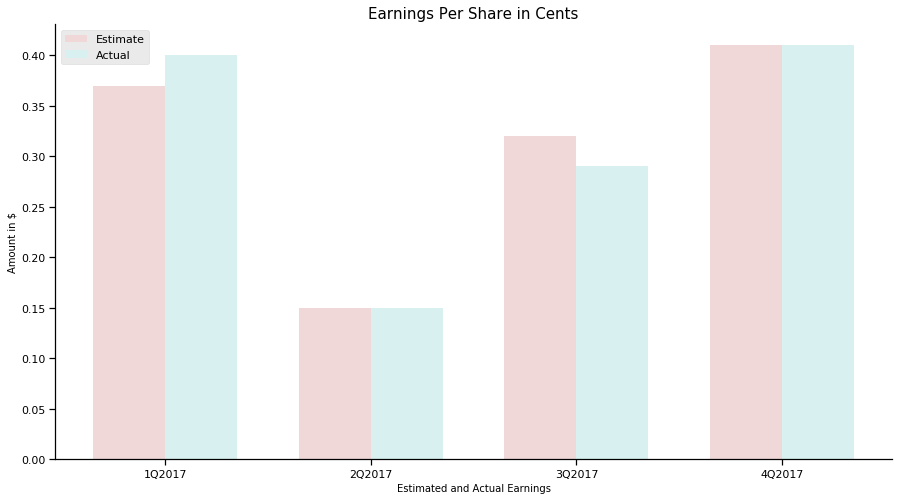

In [23]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

labels = ["Estimate", "Actual"]
#Number of pairs of bar
N = 2
# Width of each bar
width = 0.35 
#Positions of bars on the x axis
bar_positions = np.arange(len(earnings_actual))


fig, ax = plt.subplots(figsize=(15,8))
plt.bar(bar_positions, earnings_estimate, width, color="#f0d8d8")
plt.bar(bar_positions + width , earnings_actual, width, color="#D8F0F0")


plt.xticks(bar_positions + width / 2, chart_labels)
ax.set_xlabel("Estimated and Actual Earnings", fontsize=10)
ax.set_ylabel("Amount in $", fontsize=10)
ax.set_title("Earnings Per Share in Cents", fontsize=15)

plt.style.use('ggplot')
plt.rcParams['axes.edgecolor']='#000000'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#000000'
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.legend(labels)
plt.show()

#### Insights

**The earnings estimates for Q2 and Q4 were accurate, while Q1 estimate was below the actual earnings and Q3 earnings were lower than the estimated earnings.**

### Visualizing Earnings and Revenue report by Netflix

In [24]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]
rev_earnings = pd.DataFrame({"quarter":["2Q2017","3Q2017","4Q2017", "1Q2018"], "revenue": [2.79, 2.98,3.29,3.7],"earnings":[.0656,.12959,.18552,.29012]})
rev_earnings = pd.melt(rev_earnings, id_vars="quarter")
rev_earnings

,quarter,variable,value
0,2Q2017,revenue,2.79000
1,3Q2017,revenue,2.98000
2,4Q2017,revenue,3.29000
3,1Q2018,revenue,3.70000
4,2Q2017,earnings,0.06560
5,3Q2017,earnings,0.12959
6,4Q2017,earnings,0.18552
7,1Q2018,earnings,0.29012


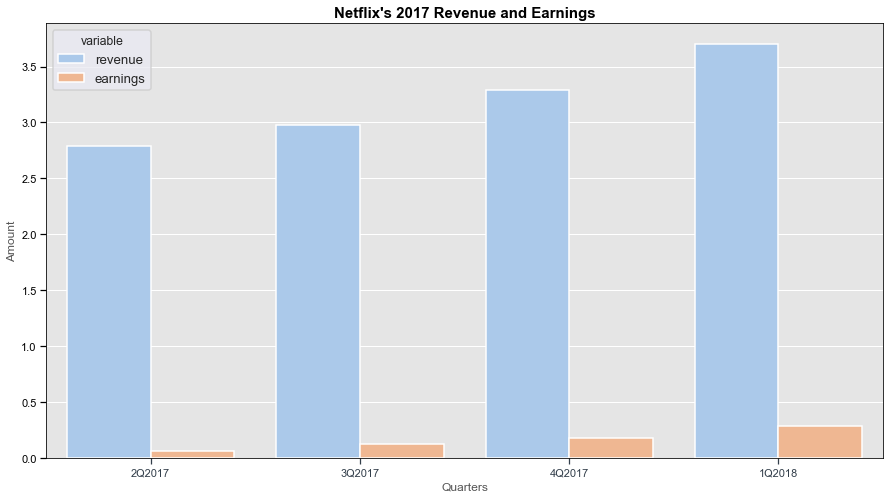

In [25]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.set_style("dark")
sns.set_context("talk", font_scale=0.8)
sns.set_palette("pastel")
sns.barplot(data=rev_earnings, x="quarter", y="value", hue="variable")
ax.set_yticks(np.arange(0,4.0,0.5))
ax.set_xlabel("Quarters")
ax.set_ylabel("Amount")
plt.title("Netflix's 2017 Revenue and Earnings", fontsize=15, fontweight="black")
plt.show()

#### Insights
**Revenue and Earnings steadily increased with each Quarter. Earnings are significantly lower than revenue and constitues less than 2% of the revenue**

### Comparison of Netflix Stock to Dow Jones Industrial Average 2017

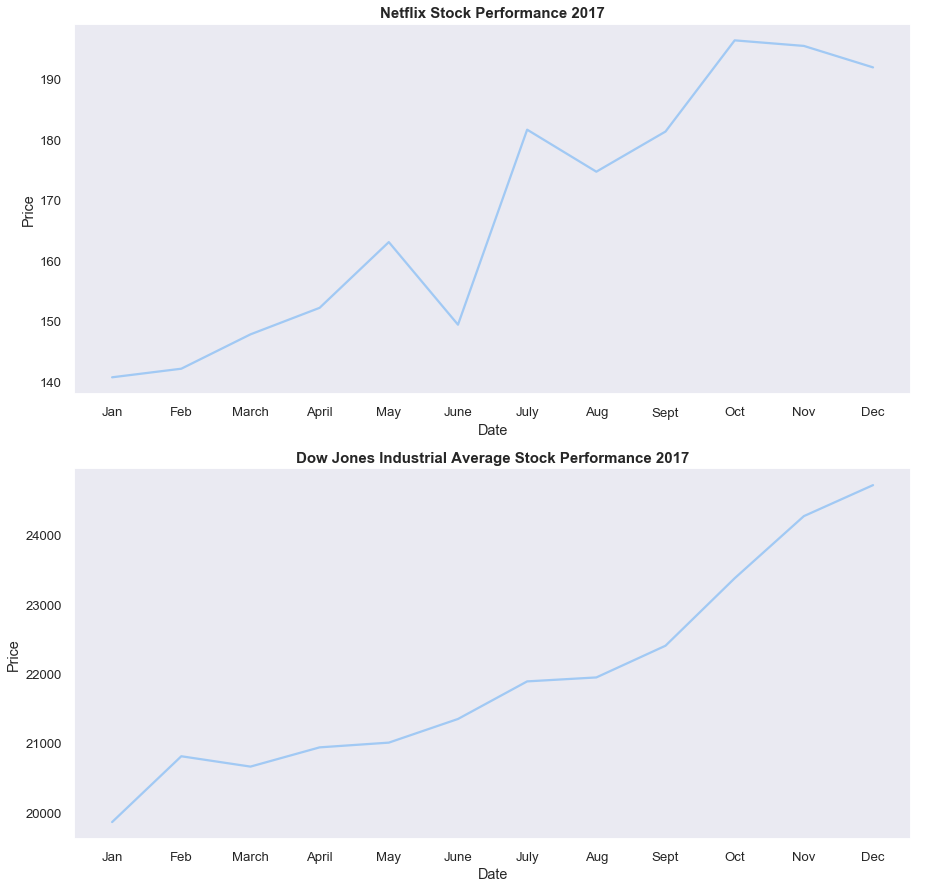

In [26]:
Months = ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

# Left plot Netflix
fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot(2,1,1)
plt.plot(netflix_stocks["Date"], netflix_stocks["Price"])
ax1.set_xticks(range(12))
ax1.set_xticklabels(Months)
ax1.set_title("Netflix Stock Performance 2017", fontsize=15, fontweight="black")
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")

# Right plot Dow Jones
ax2 = plt.subplot(2,1,2)
plt.plot(dowjones_stocks["Date"], dowjones_stocks["Price"])
ax2.set_title("Dow Jones Industrial Average Stock Performance 2017", fontsize=15, fontweight="black")
ax2.set_xticks(range(12))
ax2.set_xticklabels(Months)
ax2.set_xlabel("Date")
ax2.set_ylabel("Price")
plt.show()

#### Insights
**Netflix Stocks were more volatile than the Dow Jones Industrial Average, however, both stock prices increased over the months.**